In [ ]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z)) 
    return s


In [ ]:
print(sigmoid(5))
print(sigmoid(-300))
print(sigmoid(0.1))

0.9933071490757153
5.148200222412014e-131
0.52497918747894


In [ ]:
def forward(w, b, X, Y):
    m = X.shape[1] 
    # FORWARD PROPAGATION (FROM X TO COST)
    # compute activation
    A = sigmoid(np.dot(w.T,X) + b) 
    # compute cost
    cost = (-1/m) * np.sum(  (Y *np.log(A)) + ((1-Y) * np.log(1-A)) )
    return A, cost


In [ ]:
def backward(A, X, Y):
    m = X.shape[1]
    db = (1/m) * (np.sum(A-Y))
    dw = (1/m)*(np.dot(X,np.subtract(A,Y).T))
    grads = {"dw": dw,
             "db": db}
    return grads

In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        A, cost = forward(w, b, X, Y)
        grads = backward(A, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    return params, grads, costs

In [ ]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T,X) + b)
    for i in range(A.shape[1]):
        if (A[0,i] <=0.5):
            Y_prediction[0,i] = 0
        elif (A[0,i] > 0.5):
            Y_prediction[0,i] = 1
        pass
    return Y_prediction

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):
    w = np.zeros((X_train.shape[0], 1))
    b = 0
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    return costs

In [ ]:
import numpy as np
import h5py
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [ ]:
def load_processed_cat_dataset(train_set_x_orig, test_set_x_orig):
    train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
    test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
    train_set_x = train_set_x_flatten/255.
    test_set_x = test_set_x_flatten/255.
    return train_set_x, test_set_x


In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
train_set_x, test_set_x = load_processed_cat_dataset(train_set_x_orig, test_set_x_orig)
learning_rate = 0.005
costs = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 10000, learning_rate = learning_rate)

[0.6931471805599453, 0.5845083636993086, 0.46694904094655476, 0.37600686694802077, 0.3314632893282512, 0.30327306747438293, 0.27987958658260487, 0.26004213692587574, 0.2429406846779662, 0.22800422256726063, 0.21481951378449635, 0.20307819060644985, 0.19254427716706862, 0.18303333796883503, 0.17439859438448874, 0.16652139705400335, 0.15930451829756614, 0.15266732471296504, 0.1465422350398234, 0.1408720757031016, 0.13560807525912016, 0.13070832130477314, 0.12613655733642848, 0.12186123310162926, 0.11785474652704075, 0.11409283226927097, 0.11055406382501505, 0.10721944457861761, 0.10407206923216959, 0.10109684147524375, 0.09828023699678214, 0.09561010335573056, 0.09307549004229355, 0.09066650344102875, 0.08837418246564319, 0.08619039145561946, 0.08410772756609208, 0.08211944038800707, 0.0802193619373876, 0.0784018454741722, 0.07666171187034188, 0.07499420245735221, 0.07339493745449006, 0.07185987922058307, 0.07038529968762713, 0.06896775143115179, 0.0676040419122808, 0.06629121049345109, 

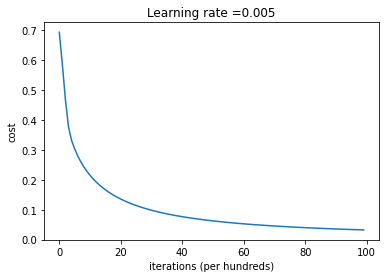

In [ ]:
import matplotlib.pyplot as plt
costs = np.squeeze(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()